In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on 2023 class practice

"""

In [35]:
import pandas as pd
x = pd.Series([6,3,8,6])
x = pd.Series([6,3,8,6], index=["q", "w", "e", "r"])
x[["r", "w"]]

age = {"Tim":29, "Jim":31, "Pam":27, "Sam":35}
x = pd.Series(age)
x

data = {'name' : ['Tim', 'Jim', 'Pam', 'Sam'],
        'age' : [29, 31, 27, 35],
        'ZIP' : ['02115', '02130', '67700', '00100']}
x = pd.DataFrame(data, columns = ["name", "age", "ZIP"])
x

x["name"]
x.name

x = pd.Series([6,3,8,6], index=["q", "w", "e", "r"])
x
x.index
sorted(x.index)
x.reindex(sorted(x.index))

x = pd.Series([6,3,8,6], index=["q", "w", "e", "r"])
y = pd.Series([7,3,5,2], index=["e", "q", "r", "t"])
x
y
x + y

e    15.0
q     9.0
r    11.0
t     NaN
w     NaN
dtype: float64

In [36]:
import numpy as np
import pandas as pd
whisky = pd.read_csv("whiskies.txt")
whisky["Region"] = pd.read_csv("regions.txt")
whisky.head()
whisky.tail()
whisky.iloc()
whisky.iloc[5:10, 0:5]
whisky.columns

flavors = whisky.iloc[:, 2:14]
flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,1,0,0,1,2,2,2
82,2,3,2,0,0,2,2,1,1,2,0,1
83,0,3,1,0,0,2,2,1,1,2,1,2
84,2,2,1,0,0,1,0,1,2,1,0,0


               Body  Sweetness     Smoky  Medicinal   Tobacco     Honey  \
Body       1.000000  -0.136518  0.524032   0.354050  0.168718  0.082031   
Sweetness -0.136518   1.000000 -0.405897  -0.392017 -0.147871  0.132558   
Smoky      0.524032  -0.405897  1.000000   0.686071  0.365501 -0.195318   
Medicinal  0.354050  -0.392017  0.686071   1.000000  0.425106 -0.396629   
Tobacco    0.168718  -0.147871  0.365501   0.425106  1.000000 -0.275490   
Honey      0.082031   0.132558 -0.195318  -0.396629 -0.275490  1.000000   
Spicy      0.188500  -0.054200  0.231745   0.044903  0.054068  0.139563   
Winey      0.408576   0.115727 -0.028190  -0.202651  0.009097  0.362021   
Nutty      0.126323  -0.032493 -0.023132  -0.113671 -0.117717  0.188492   
Malty     -0.116859  -0.001516 -0.192875  -0.258959 -0.059347  0.310184   
Fruity    -0.013205   0.019820 -0.312970  -0.330975 -0.235145  0.108822   
Floral    -0.461203   0.144987 -0.431663  -0.511323 -0.212375  0.183029   

              Spicy     

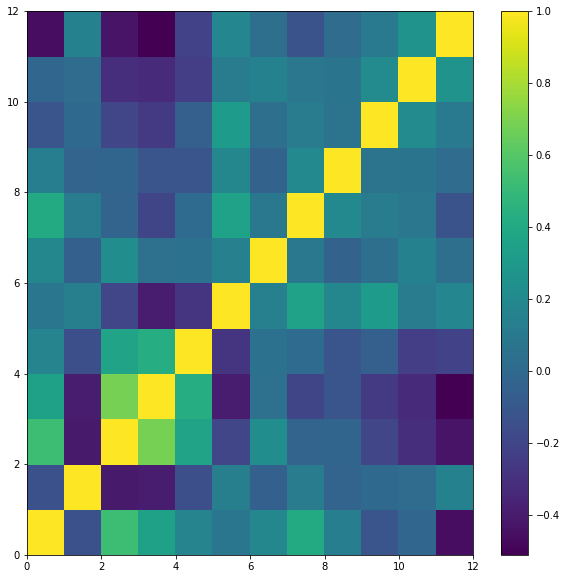

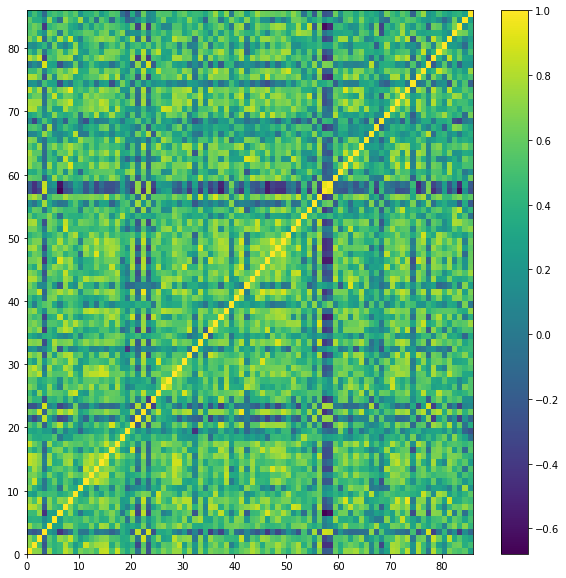

In [37]:
corr_flavors = pd.DataFrame.corr(flavors)
print(corr_flavors)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.pcolor(corr_flavors)
plt.colorbar()
plt.savefig("corr_flavors.pdf")

corr_whisky = pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize=(10,10))
plt.pcolor(corr_whisky)
plt.axis("tight")
plt.colorbar()
#plt.savefig("corr_whisky1.pdf")

In [38]:
from sklearn.cluster import SpectralCoclustering
model = SpectralCoclustering(n_clusters=6, random_state=0)
model.fit(corr_whisky)
model.rows_

np.sum(model.rows_, axis=0)
model.row_labels_

array([5, 2, 3, 4, 5, 0, 3, 2, 5, 3, 2, 0, 5, 0, 5, 5, 0, 5, 0, 1, 3, 4,
       3, 4, 3, 3, 2, 2, 3, 2, 3, 5, 0, 0, 0, 5, 2, 3, 0, 1, 0, 3, 2, 2,
       2, 0, 5, 0, 0, 3, 3, 2, 2, 2, 0, 1, 5, 4, 4, 0, 3, 5, 2, 5, 5, 2,
       1, 5, 1, 0, 2, 5, 0, 5, 2, 5, 3, 4, 5, 3, 0, 3, 2, 0, 2, 0],
      dtype=int32)

(0.0, 86.0, 0.0, 12.0)

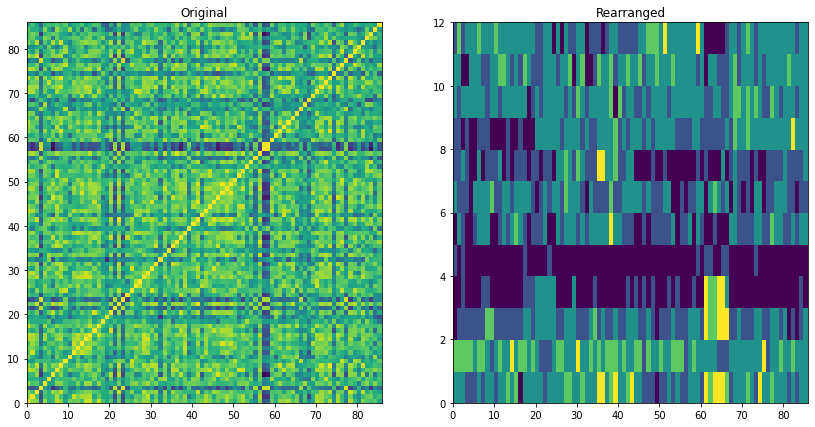

In [39]:
whisky['Group'] = pd.Series(model.row_labels_, index=whisky.index)
whisky = whisky.iloc[np.argsort(model.row_labels_)]
whisky = whisky.reset_index(drop=True)
correlations = pd.DataFrame(whisky.iloc[:, 2:14].transpose())
correlations = np.array(correlations)

import matplotlib.pyplot as plt
plt.figure(figsize = (14, 7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis("tight")
#plt.savefig("correlations.pdf")

In [40]:
import pandas as pd
data = pd.Series([1,2,3,4])
data = data.iloc[[3,0,1,2]]
data[0]

import pandas as pd
data = pd.Series([1,2,3,4])
data = data.iloc[[3,0,1,2]]
data = data.reset_index(drop=True)
data[0]

4

In [48]:
whisky = pd.read_csv("corr_test.csv", index_col=0)
correlations = pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())
correlations = np.array(correlations)

In [49]:
print(whisky)

    RowID          Distillery  Body  Sweetness  Smoky  Medicinal  Tobacco  \
0      86        Tullibardine     2          3      0          0        1   
1      34           GlenElgin     2          3      1          0        0   
2      33  GlenDeveronMacduff     2          3      1          1        1   
3      41            GlenSpey     1          3      1          0        0   
4      46         Glenfiddich     1          3      1          0        0   
..    ...                 ...   ...        ...    ...        ...      ...   
81     47           Glengoyne     1          2      0          0        0   
82     32            Edradour     2          3      1          0        0   
83     36           GlenGrant     1          2      0          0        0   
84     72               Scapa     2          2      1          1        0   
85      1           Aberfeldy     2          2      2          0        0   

    Honey  Spicy  Winey  Nutty  Malty  Fruity  Floral     Postcode   Latitu